In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd drive/MyDrive/[한이음] 적대적 AI 공격에 대한 인공지능 보안기술 연구/3. 소스코드/GTSRB

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install denoising_diffusion_pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import torch
from denoising_diffusion_pytorch import Unet, GaussianDiffusion

model = Unet(
    dim = 64,
    dim_mults = (1, 2, 4, 8)
)

diffusion = GaussianDiffusion(
    model,
    image_size = 128,
    timesteps = 1000,   # number of steps
    loss_type = 'l1'    # L1 or L2
)

training_images = torch.randn(8, 3, 128, 128) # images are normalized from 0 to 1
loss = diffusion(training_images)
loss.backward()
# after a lot of training

sampled_images = diffusion.sample(batch_size = 4)
sampled_images.shape # (4, 3, 128, 128)

sampling loop time step: 0it [00:00, ?it/s]

torch.Size([4, 3, 128, 128])

In [4]:
imgs = np.array(sampled_images)
img = imgs[0]

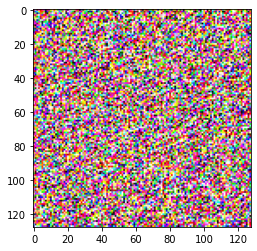

In [5]:
img = img.transpose(1,2,0)
plt.imshow(img)

In [6]:
from denoising_diffusion_pytorch import Unet, GaussianDiffusion, Trainer

model = Unet(
    dim = 64,
    dim_mults = (1, 2, 4, 8)
).cuda()

diffusion = GaussianDiffusion(
    model,
    image_size = 128,
    timesteps = 1000,           # number of steps
    sampling_timesteps = 250,   # number of sampling timesteps (using ddim for faster inference [see citation for ddim paper])
    loss_type = 'l1'            # L1 or L2
).cuda()

trainer = Trainer(
    diffusion,
    'path/to/your/images',
    train_batch_size = 32,
    train_lr = 8e-5,
    train_num_steps = 700000,         # total training steps
    gradient_accumulate_every = 2,    # gradient accumulation steps
    ema_decay = 0.995,                # exponential moving average decay
    amp = True                        # turn on mixed precision
)

trainer.train()